# EgoHands bounding box visualization

Start by importing necessary packages.

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd
import json

Zidane example.

1280 720 0 616.60032 456.50016000000005 884.0 513.56016
1280 720 0 948.60032 377.50032000000004 402.88 672.04008


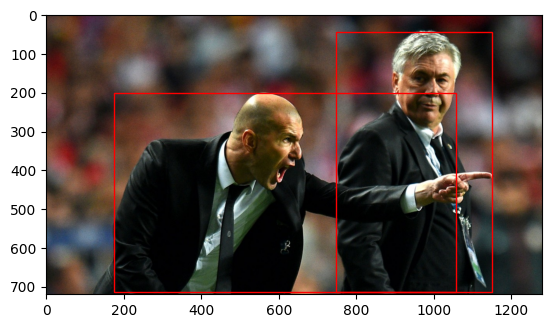

In [2]:
img = "./ultralytics/data/images/zidane.jpg"
lbl = "./ultralytics/data/labels/zidane.txt"

im = Image.open(img)
img_w = im.size[0]
img_h = im.size[1]

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Get bounding boxes from label file
bounding_boxes = []
with open(lbl, 'r') as file:
    for line in file:
        parts = line.strip().split()  # Split the line by spaces
        class_id = int(parts[0])
        x_center = float(parts[1])
        y_center = float(parts[2])
        width = float(parts[3])
        height = float(parts[4])
        
        bounding_box = [class_id, x_center, y_center, width, height]
        bounding_boxes.append(bounding_box)

# Draw bbs as rectangle onto image
for i, bb in enumerate(bounding_boxes):
    # un-normalize values
    xc = bb[1] * img_w
    yc = bb[2] * img_h
    w = bb[3] * img_w
    h = bb[4] * img_h

    print(img_w, img_h, bb[0], xc, yc, w, h)
    

    # Create a Rectangle patch
    rect = patches.Rectangle((xc-w/2, yc-h/2), w, h, linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

Visualization of validation images.

img w: 640, img h: 480, class: 10, bb_xc: 306.875, bb_yc: 330.61, bb_w: 611.59, bb_h: 285.84
img w: 640, img h: 480, class: 10, bb_xc: 471.37, bb_yc: 118.65, bb_w: 319.2799999999999, bb_h: 228.67999999999998
img w: 640, img h: 480, class: 10, bb_xc: 217.24, bb_yc: 201.07, bb_w: 434.48, bb_h: 375.12
img w: 640, img h: 480, class: 13, bb_xc: 413.9749999999999, bb_yc: 63.62499999999998, bb_w: 75.55, bb_h: 46.53
img w: 640, img h: 480, class: 13, bb_xc: 494.81499999999994, bb_yc: 62.30499999999998, bb_w: 58.07000000000001, bb_h: 46.669999999999966
img w: 640, img h: 480, class: 13, bb_xc: 427.71000000000004, bb_yc: 108.91499999999995, bb_w: 84.02, bb_h: 70.50999999999999
img w: 640, img h: 480, class: 13, bb_xc: 411.43, bb_yc: 38.02499999999995, bb_w: 94.76, bb_h: 71.06999999999995


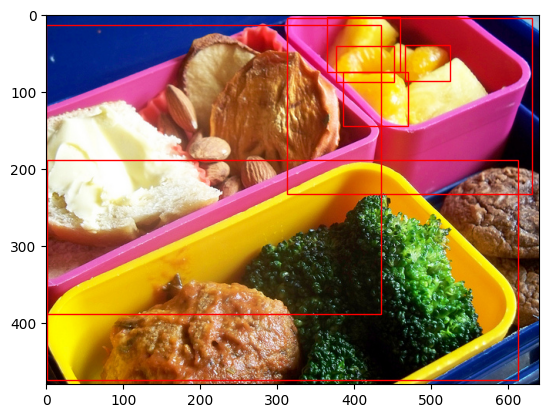

img w: 640, img h: 428, class: 15, bb_xc: 332.30000000000007, bb_yc: 193.07999999999998, bb_w: 254.88, bb_h: 324.12


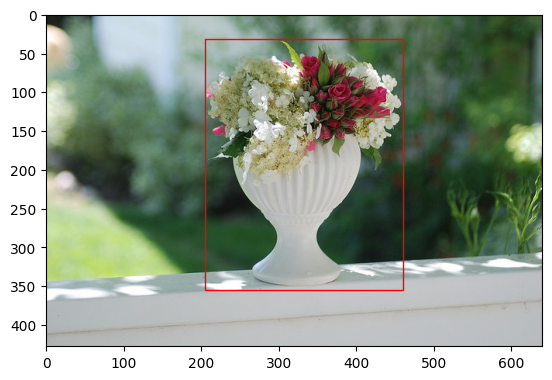

img w: 640, img h: 425, class: 3, bb_xc: 221.575, bb_yc: 209.63499999999996, bb_w: 441.23, bb_h: 379.15


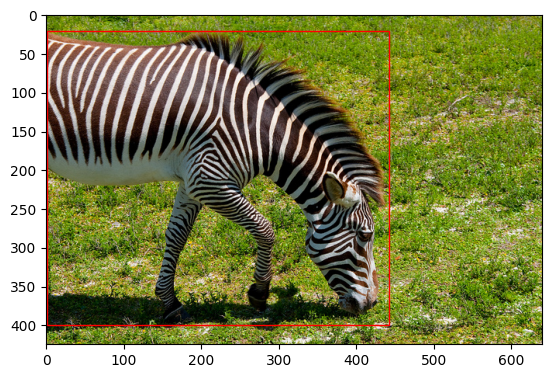

img w: 381, img h: 500, class: 15, bb_xc: 237.18999999999997, bb_yc: 449.805, bb_w: 70.83999999999999, bb_h: 47.229999999999954


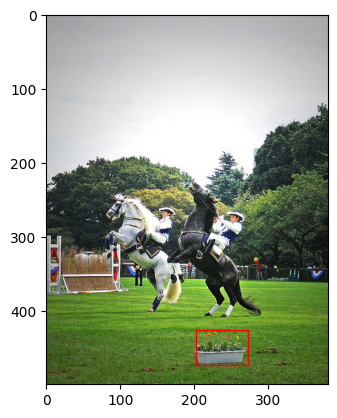

img w: 480, img h: 640, class: 1, bb_xc: 140.54, bb_yc: 466.58000000000004, bb_w: 176.35999999999999, bb_h: 157.62
img w: 480, img h: 640, class: 17, bb_xc: 189.19, bb_yc: 118.345, bb_w: 154.29999999999998, bb_h: 152.31


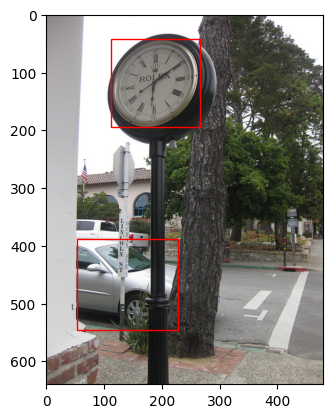

In [5]:
img_path = '../../../OptiVisT/aibox/datasets/cocohands/val/images/' # "./ultralytics/ds/images/val/"
lbl_path = '../../../OptiVisT/aibox/datasets/cocohands/val/labels/' # "./ultralytics/ds/labels/val/"
images = sorted([f for f in os.listdir(img_path) if os.path.isfile(os.path.join(img_path, f))], reverse=True) # add reverse to see EgoHands images, else COCO
labels = sorted([f for f in os.listdir(lbl_path) if os.path.isfile(os.path.join(lbl_path, f))], reverse=True)

for i, img in enumerate(images):

    if i == 5: # 2647 images in validation set
        break
    
    im = Image.open(img_path+img)
    img_w = im.size[0]
    img_h = im.size[1]

    # Create figure and axes
    fig, ax = plt.subplots()
    
    # Display the image
    ax.imshow(im)

    # Get bounding boxes from label file
    label = labels[i]
    bounding_boxes = []
    with open(lbl_path+label, 'r') as file:
        for line in file:
            parts = line.strip().split()  # Split the line by spaces
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            
            bounding_box = [class_id, x_center, y_center, width, height]
            bounding_boxes.append(bounding_box)

    # Draw bbs as rectangle onto image
    for i, bb in enumerate(bounding_boxes):
        # un-normalize values
        xc = bb[1] * img_w
        yc = bb[2] * img_h
        w = bb[3] * img_w
        h = bb[4] * img_h

        print(f'img w: {img_w}, img h: {img_h}, class: {bb[0]}, bb_xc: {xc}, bb_yc: {yc}, bb_w: {w}, bb_h: {h}')
        
    
        # Create a Rectangle patch
        rect = patches.Rectangle((xc-w/2, yc-h/2), w, h, linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the patch to the Axes
        ax.add_patch(rect)
    
    plt.show()

COCO annotations seem to be correct, let's check EH annotations from the source (json file before processed and converted into txt).

720 1280
1280 720 1 413 371 303
1280 720 639 352 443 366
1280 720 518 21 180 225
1280 720 243 25 226 225


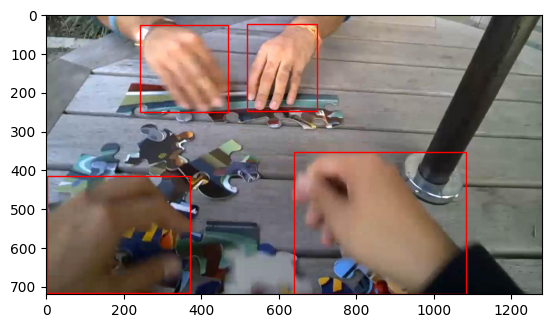

In [69]:
img = "../datasets/egohands/PUZZLE_COURTYARD_T_H_frame_1174_jpg.rf.2f9fc7acce0945e36a1497da3e832311.jpg"
lbl = "../datasets/egohands/train_hands.json" # img_id: 45, ids: 135, 136, 137, 138

im = Image.open(img)
img_w = im.size[0]
img_h = im.size[1]
print(img_h, img_w)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Get bounding boxes from label file
f = open(lbl)
labels = json.load(f)
myleft = labels['annotations'][135]['bbox']
myright = labels['annotations'][136]['bbox']
yourleft = labels['annotations'][137]['bbox']
yourright = labels['annotations'][138]['bbox']

bounding_boxes = [myleft, myright, yourleft, yourright]

# Draw bbs as rectangle onto image
for i, bb in enumerate(bounding_boxes):
    xmin = bb[0]
    ymin = bb[1]
    w = bb[2]
    h = bb[3]

    print(img_w, img_h, xmin, ymin, w, h)

    # Create a Rectangle patch
    rect = patches.Rectangle((xmin, ymin), w, h, linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

Bounding boxes look correct from source, so the problem is most probably the rescaling step --> try to remove this step from the ds creation pipeline as the images are automatically rescaled in the train.py .